In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

from matplotlib import font_manager, rc

#사용하려는 OTF 폰트의 경로를 지정합니다.
font_path = r'C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NotoSansKR-Regular.otf'

#폰트 이름을 가져옵니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()

#폰트를 설정합니다.
rc('font', family=font_name)

In [7]:
file_path = 'C:\Python Project\Seoul_Education_Data_Competition_2024\Excel\elementary_school_2014to2023.xlsx'
df = pd.read_excel(file_path, engine='openpyxl', header=0)

df = df.iloc[:, 2:]
df.set_index('시점', inplace=True)

col_name = ['학급 수', '학생 수', '입학자 수', '졸업자 수']
df.columns = col_name

df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 2014 to 2023
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학급 수    10 non-null     float64
 1   학생 수    10 non-null     float64
 2   입학자 수   10 non-null     float64
 3   졸업자 수   10 non-null     float64
dtypes: float64(4)
memory usage: 400.0 bytes


,학급 수,학생 수,입학자 수,졸업자 수
시점,,,,
2014,18854.0,457517.0,79656.0,88172.0
2015,18780.0,450675.0,75258.0,78066.0
2016,18621.0,436121.0,69944.0,79123.0
2017,18625.0,428333.0,72529.0,75440.0
2018,18585.0,424800.0,70686.0,67742.0
2019,18690.0,422293.0,72171.0,69664.0
2020,18561.0,409536.0,64898.0,74375.0
2021,18396.0,399435.0,63690.0,70430.0
2022,18367.0,393565.0,64013.0,65432.0


[]

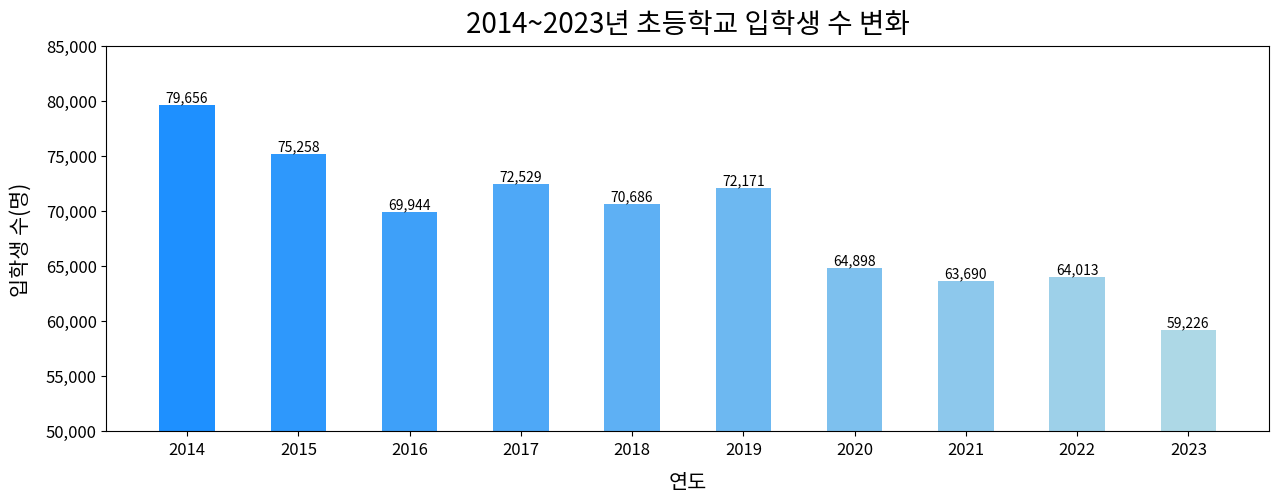

In [8]:
from matplotlib.ticker import FuncFormatter
import matplotlib.cm as cm 
from matplotlib.colors import Normalize

#입학자 데이터프레임
df_enroll = df[['입학자 수']]

#그래프 크기
plt.figure(figsize=(15,5))

#x축
x = df_enroll.index.to_list()

#막대 그래프 너비 설정(기본값: 0.8)
bar_width = 0.5

#색상
start_color = np.array([30,144,255]) / 255
end_color = np.array([173,216,230]) / 255

#각 막대의 색상 설정
num_bars = len(x)
colors = [(1 - i / (num_bars - 1)) * start_color + (i / (num_bars - 1)) * end_color for i in range(num_bars)]

#막대 그래프 생성
bars = plt.bar(x, df_enroll['입학자 수'], color=colors, width=bar_width)

#타이틀
plt.title('2014~2023년 초등학교 입학생 수 변화', fontsize=20, pad=10)

#x축
plt.xlabel('연도', labelpad=10, fontsize=15)
plt.xticks(x, fontsize=12)
plt.ylabel('입학생 수(명)', labelpad=10, fontsize=15)
plt.yticks(fontsize=12)
plt.ylim(50000, 85000)

#천 단위 쉼표 추가 함수
def comma(x, pos):
    return f'{int(x):,}'

#y축 값에 천 단위 쉼표 추가
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma))

#막대 그래프 위에 값 작성
for bar in bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val, format(int(y_val), ','), ha='center', va='bottom', fontsize=10)

plt.plot()

In [4]:
df['학급 당 학생 수'] = round(df['학생 수'] / df['학급 수'], 2)
df_ratio = df[['학급 당 학생 수']]
df_ratio

,학급 당 학생 수
시점,
2014,24.27
2015,24.00
2016,23.42
2017,23.00
2018,22.86
2019,22.59
2020,22.06
2021,21.71
2022,21.43


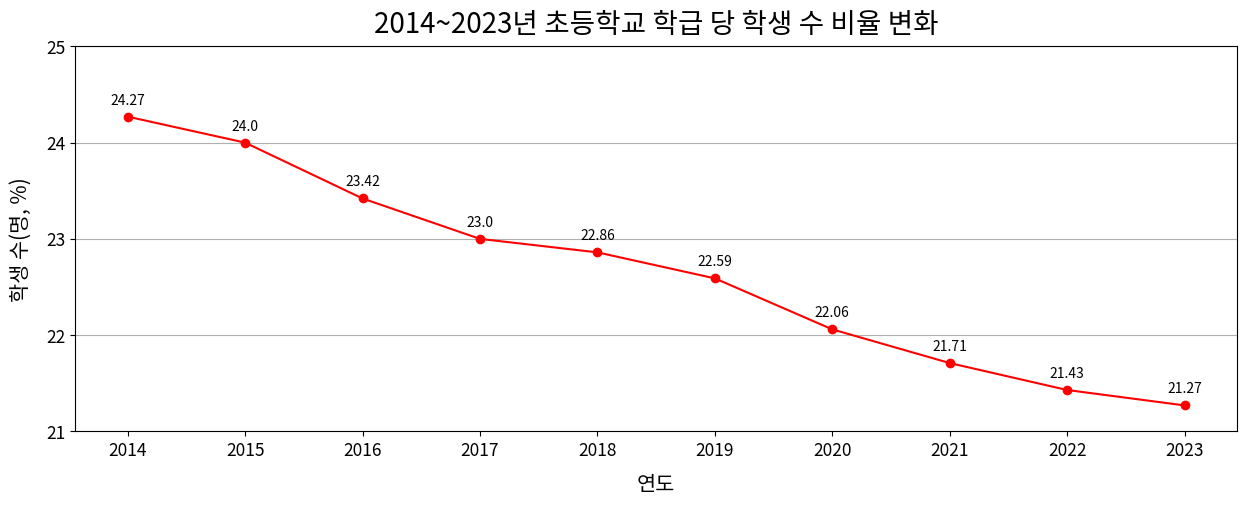

In [11]:
plt.figure(figsize=(15,5))  #그래프 크기

plt.grid(axis='y')  #가로선만 그리드 표시

x = df_ratio.index.to_list()    #x축값

plt.plot(df_ratio, color='red', marker='o')

#각 값들을 그래프 위에 추가
for i, txt in enumerate(df_ratio['학급 당 학생 수']):
    plt.text(x[i], txt+0.1, f'{txt}', ha='center', va='bottom', fontsize=10)

#타이틀
plt.title('2014~2023년 초등학교 학급 당 학생 수 비율 변화', pad=10, fontsize=20)

#x, y축
plt.xlabel('연도', labelpad=10, fontsize=15)
plt.xticks(x, fontsize=12.5)
plt.ylabel('학생 수(명, %)', labelpad=10, fontsize=15)
plt.yticks(range(21, 26), fontsize=12.5)
plt.show()


1. `for i, txt in enumerate(selected_class['학급 당 학생 수']):`
   - 이 코드는 반복문을 통해 '학급 당 학생 수' 열에서 각 값을 순회합니다. `enumerate()` 함수는 순회하는 동안 각 값의 인덱스를 제공하므로, `i`는 각 값의 인덱스를, `txt`는 각 값 자체를 나타냅니다.

2. `plt.text(x[i], txt+0.1, f'{txt}', ha='center', va='bottom', fontsize=10)`
   - 이 코드는 `plt.text()` 함수를 사용하여 텍스트를 그래프 상에 표시합니다.
   - `x[i]`는 x축의 위치를 지정합니다. 여기서 `i`는 각 데이터 포인트의 인덱스를 나타내며, `x[i]`는 해당 데이터 포인트의 x축 위치를 의미합니다.
   - `txt+0.1`은 텍스트가 표시될 y축의 위치를 지정합니다. 각 데이터 포인트의 y축 값에 0.1을 더하여 약간 위로 이동시켜 텍스트가 데이터 포인트 위에 표시되도록 합니다.
   - `f'{txt}'`는 텍스트의 내용을 나타냅니다. 여기서 `txt`는 각 데이터 포인트의 값입니다.
   - `ha='center'`는 텍스트의 가로 정렬을 가운데로 지정합니다.
   - `va='bottom'`은 텍스트의 세로 정렬을 아래쪽으로 지정합니다.
   - `fontsize=10`은 텍스트의 폰트 크기를 지정합니다.